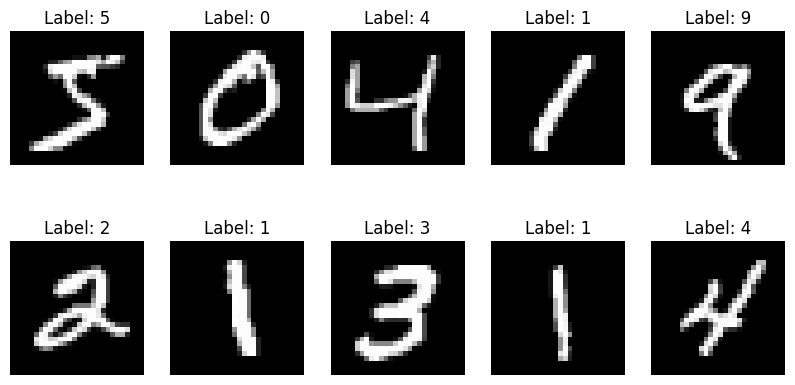

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [28]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plot the first few images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 0.8917 - accuracy: 0.7116 - val_loss: 0.2924 - val_accuracy: 0.9197
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5020 - accuracy: 0.8478 - val_loss: 0.2238 - val_accuracy: 0.9360
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.8699 - val_loss: 0.2008 - val_accuracy: 0.9432
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.3796 - accuracy: 0.8870 - val_loss: 0.1754 - val_accuracy: 0.9497
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8947 - val_loss: 0.1663 - val_accuracy: 0.9522
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3230 - accuracy: 0.9026 - val_loss: 0.1517 - val_accuracy: 0.9543
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3157 - accuracy: 0.9053 - val_loss: 0.1448 - val_accuracy: 0.9577
Epoch 

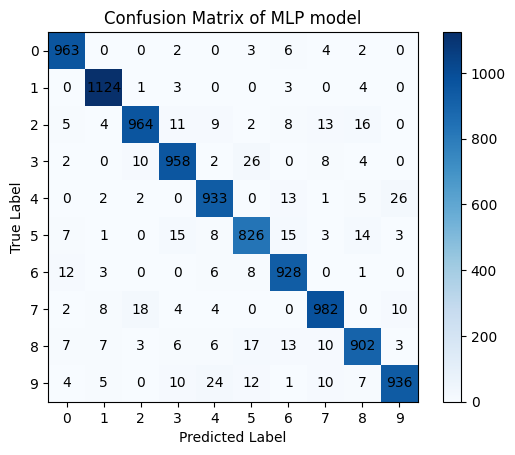

In [29]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for MLP input
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

# Define the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate the model on the original test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Predict classes for test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of MLP model')
plt.show()


Accuracy: 0.9704
F1 Score: 0.9703722598097007


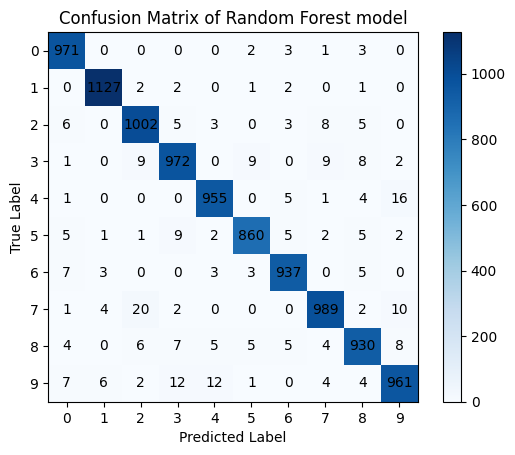

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict classes for test set
y_pred = rf_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest model')
plt.show()


Accuracy: 0.9256
F1 Score: 0.9254454253831236


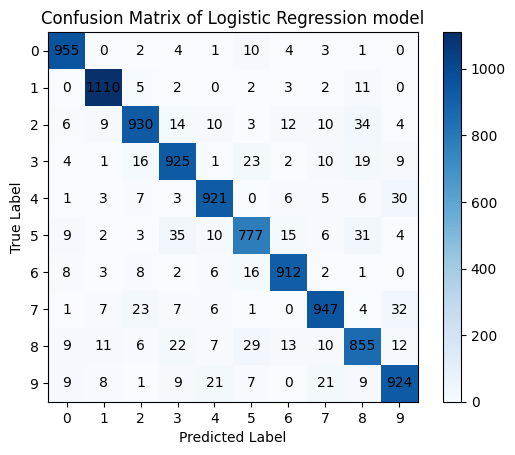

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Define and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train, y_train)

# Predict classes for test set
y_pred = lr_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression model')
plt.show()

313/313 [==============================] - 0s 1ms/step


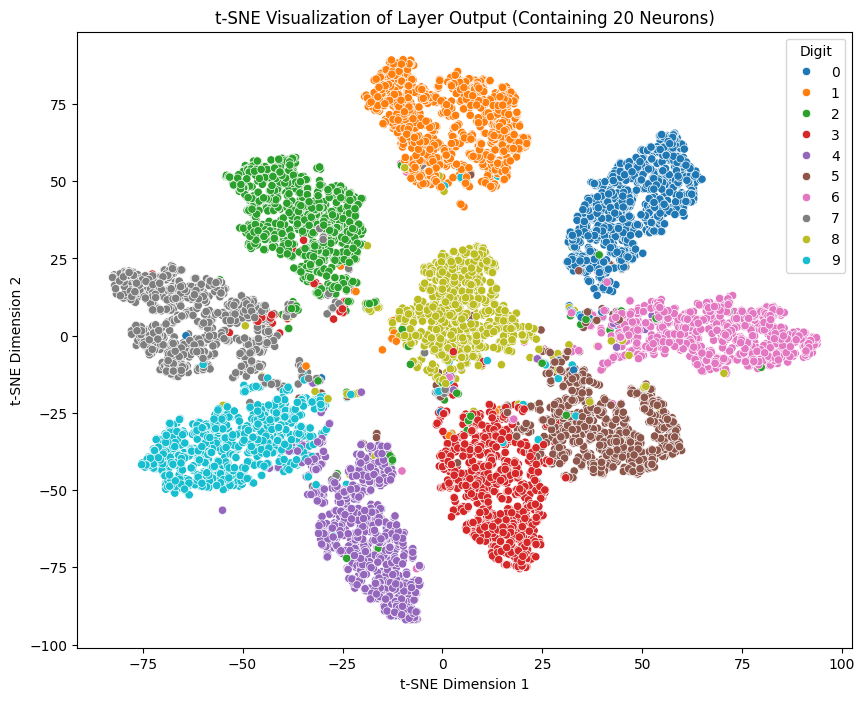

In [32]:
import numpy as np
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the output from the layer containing 20 neurons for the test set
layer_output_model = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
layer_output = layer_output_model.predict(x_test)  # Pass the flattened input data

# Apply t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_output = tsne.fit_transform(layer_output)

# Plot t-SNE embeddings for the output from the layer containing 20 neurons
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_output[:, 0], y=tsne_output[:, 1], hue=y_test, palette='tab10', legend='full')
plt.title('t-SNE Visualization of Layer Output (Containing 20 Neurons)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Digit')
plt.show()


313/313 [==============================] - 0s 1ms/step


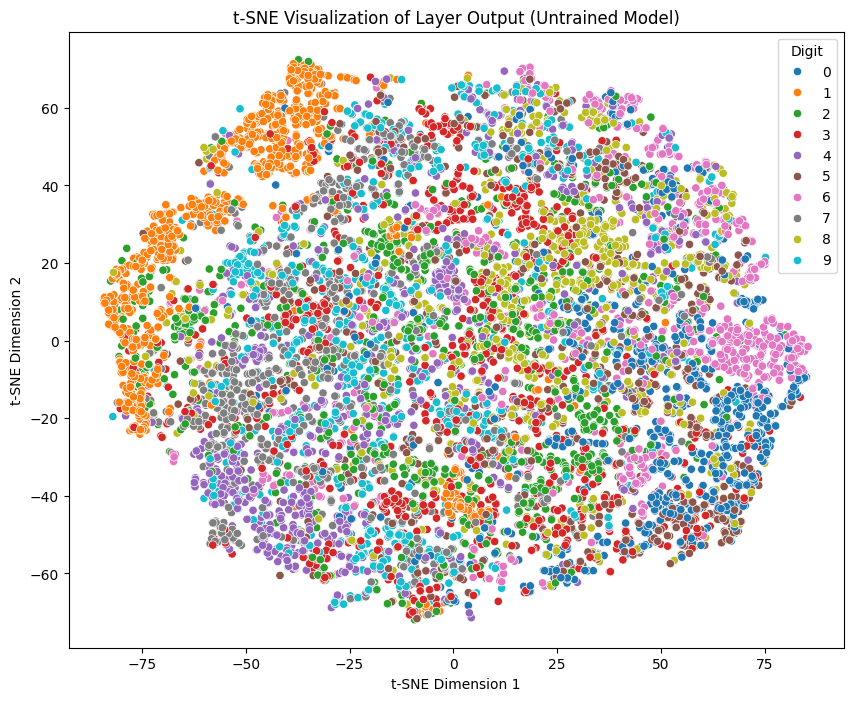

In [33]:
# Define a new untrained MLP model
untrained_model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the untrained model
untrained_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Extract the output from the layer containing 20 neurons for the untrained model
layer_output_model_untrained = tf.keras.Model(inputs=untrained_model.input, outputs=untrained_model.layers[2].output)
layer_output_untrained = layer_output_model_untrained.predict(x_test)

# Apply t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_output_untrained = tsne.fit_transform(layer_output_untrained)

# Plot t-SNE embeddings for the untrained model
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_output_untrained[:, 0], y=tsne_output_untrained[:, 1], hue=y_test, palette='tab10', legend='full')
plt.title('t-SNE Visualization of Layer Output (Untrained Model)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Digit')
plt.show()


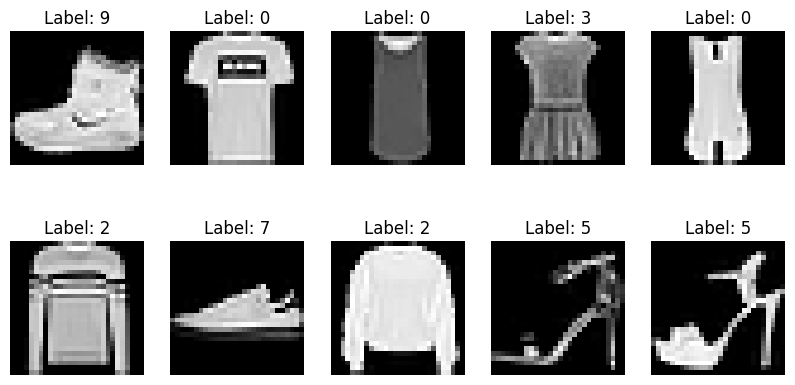

In [34]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(x_train_fashion, y_train_fashion), (_, _) = fashion_mnist.load_data()

# Plot the first few images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_fashion[i], cmap='gray')
    plt.title(f'Label: {y_train_fashion[i]}')
    plt.axis('off')
plt.show()


313/313 [==============================] - 1s 3ms/step - loss: 8.7434 - accuracy: 0.0990
Fashion-MNIST Test accuracy: 0.0990
313/313 [==============================] - 1s 2ms/step
Fashion-MNIST F1 Score: 0.0647228381543183


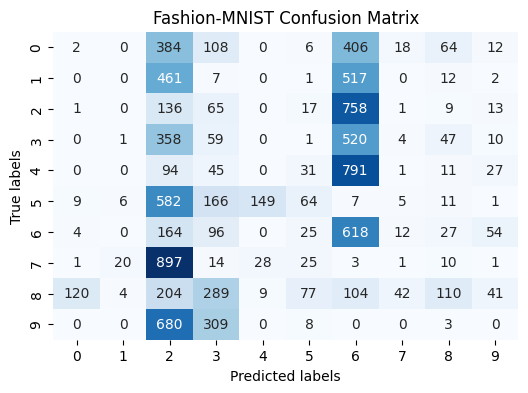

In [38]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Normalize pixel values to range [0, 1]
x_test_fashion = x_test_fashion.astype('float32') / 255.0

# Flatten the images for MLP input
x_test_fashion = x_test_fashion.reshape((-1, 28 * 28))

# Evaluate the trained model on the Fashion-MNIST test set
test_loss_fashion, test_accuracy_fashion = model.evaluate(x_test_fashion, y_test_fashion)
print(f'Fashion-MNIST Test accuracy: {test_accuracy_fashion:.4f}')

# Predict classes for Fashion-MNIST test set
y_pred_fashion = np.argmax(model.predict(x_test_fashion), axis=-1)

# Calculate F1 score for Fashion-MNIST test set
f1_fashion = f1_score(y_test_fashion, y_pred_fashion, average='weighted')
print("Fashion-MNIST F1 Score:", f1_fashion)

# Calculate confusion matrix for Fashion-MNIST test set
conf_matrix_fashion = confusion_matrix(y_test_fashion, y_pred_fashion)

# Plot confusion matrix for Fashion-MNIST test set
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_fashion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Fashion-MNIST Confusion Matrix')
plt.show()


313/313 [==============================] - 0s 1ms/step


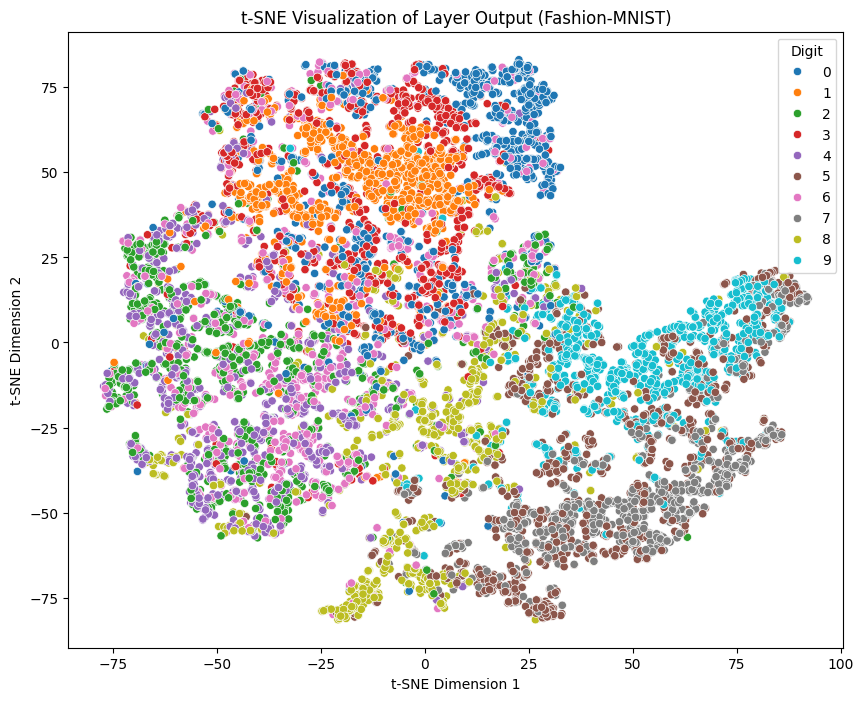

In [37]:
from sklearn.manifold import TSNE

# Extract the output from the layer containing 20 neurons for the Fashion-MNIST test set
layer_output_model = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
layer_output_fashion = layer_output_model.predict(x_test_fashion)

# Apply t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_output_fashion = tsne.fit_transform(layer_output_fashion)

# Plot t-SNE embeddings for the Fashion-MNIST test set
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_output_fashion[:, 0], y=tsne_output_fashion[:, 1], hue=y_test_fashion, palette='tab10', legend='full')
plt.title('t-SNE Visualization of Layer Output (Fashion-MNIST)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Digit')
plt.show()